# RADI605_A3_PasitSupholkhan (Assignment: Random Survival Forests)



# Assignment: Random Survival Forest (20 points)
due: Feb 14, 2023

In [6]:
!pip install scikit-survival

In [12]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print('Pandas version :',pd.__version__)
print('Numpy version :',np.__version__)

Pandas version : 1.4.4
Numpy version : 1.23.3


## Please use a Worcester Heart Attack dataset (whas500)

In [34]:
from sksurv.datasets import load_whas500
X, y = load_whas500()
X

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
0,1,83.0,0,25.54051,0,1,78.0,0,89.0,5.0,1,0,0,152.0
1,0,49.0,0,24.02398,0,1,60.0,0,84.0,5.0,0,1,0,120.0
2,0,70.0,0,22.14290,0,0,88.0,1,83.0,5.0,0,1,0,147.0
3,0,70.0,0,26.63187,1,1,76.0,0,65.0,10.0,0,1,0,123.0
4,0,70.0,0,24.41255,0,1,85.0,0,63.0,6.0,0,1,0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,76.0,0,27.96454,0,1,88.0,1,68.0,1.0,0,1,0,112.0
496,0,76.0,0,24.26862,0,1,96.0,1,88.0,3.0,0,0,0,208.0
497,1,57.0,0,42.13576,0,1,74.0,1,123.0,3.0,0,0,0,120.0
498,0,67.0,0,27.40905,0,1,62.0,0,59.0,1.0,0,1,0,112.0


In [13]:
y

array([(False, 2.178e+03), (False, 2.172e+03), (False, 2.190e+03),
       ( True, 2.970e+02), (False, 2.131e+03), ( True, 1.000e+00),
       (False, 2.122e+03), ( True, 1.496e+03), ( True, 9.200e+02),
       (False, 2.175e+03), (False, 2.173e+03), ( True, 1.671e+03),
       (False, 2.192e+03), ( True, 8.650e+02), (False, 2.166e+03),
       (False, 2.168e+03), ( True, 9.050e+02), ( True, 2.353e+03),
       (False, 2.146e+03), ( True, 6.100e+01), ( True, 2.358e+03),
       (False, 2.114e+03), (False, 2.132e+03), (False, 2.139e+03),
       (False, 2.048e+03), (False, 2.152e+03), ( True, 6.000e+00),
       (False, 2.156e+03), ( True, 1.180e+02), (False, 2.064e+03),
       ( True, 8.490e+02), ( True, 7.140e+02), (False, 2.057e+03),
       ( True, 2.000e+00), ( True, 7.000e+00), (False, 2.151e+03),
       ( True, 6.000e+00), ( True, 4.220e+02), ( True, 3.540e+02),
       (False, 2.065e+03), (False, 2.048e+03), ( True, 1.065e+03),
       ( True, 5.350e+02), (False, 2.118e+03), ( True, 9.700e+

## Split whas500 into training and testing set (70:30)

In [25]:
#Spliting data 30% as test / 70% as training
from sklearn.model_selection import train_test_split
seed = 6536115
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=seed)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(350, 14) (150, 14) (350,) (150,)


## Build a random survival forest model by using training set  

In [41]:
#Training
from sksurv.ensemble import RandomSurvivalForest
rsf = RandomSurvivalForest(n_estimators=1000,
min_samples_split=10,
min_samples_leaf=15,
max_features="sqrt",
n_jobs=-1,
random_state=seed)
rsf.fit(X_train,y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=6536115)

## Evaluate your model performance by using testing set

In [42]:
#check how well the model performs by evaluating it on the test data.
rsf.score(X_test, y_test)

0.7905180248409572

In [43]:
X_test

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
199,0,45.0,0,37.06646,0,1,70.0,0,110.0,3.0,0,1,0,130.0
43,0,62.0,0,33.33395,0,1,50.0,0,50.0,5.0,0,0,0,80.0
289,0,63.0,0,28.12934,0,1,92.0,0,54.0,9.0,0,1,0,139.0
212,0,47.0,0,38.78883,0,0,99.0,0,101.0,2.0,0,1,0,144.0
61,0,63.0,0,21.25718,1,1,70.0,1,76.0,4.0,0,1,0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,0,61.0,0,25.46070,1,0,80.0,1,111.0,5.0,0,0,0,130.0
89,0,82.0,0,17.89146,0,1,70.0,1,83.0,7.0,0,0,0,148.0
170,1,65.0,0,26.95468,0,0,90.0,0,42.0,7.0,0,1,0,130.0
144,1,50.0,0,23.88798,0,1,94.0,1,72.0,4.0,0,1,0,138.0


In [48]:
#Predicting
#Let’s first select a couple of patients from the test data according to the number of positive lymphn odes and age
X_test_sorted = X_test.sort_values(by=["sysbp", "age"])
X_test_sel = pd.concat((X_test_sorted.head(3), X_test_sorted.tail(3)))
X_test_sel

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
285,0,88.0,0,21.28707,0,0,30.0,0,140.0,8.0,1,0,0,75.0
196,0,73.0,0,26.60883,0,1,50.0,0,64.0,3.0,0,1,0,76.0
43,0,62.0,0,33.33395,0,1,50.0,0,50.0,5.0,0,0,0,80.0
238,0,78.0,0,30.23193,1,1,102.0,1,108.0,4.0,0,0,0,212.0
151,0,63.0,0,25.06101,0,1,108.0,1,71.0,3.0,0,0,0,216.0
70,0,76.0,0,18.35824,1,1,103.0,1,112.0,7.0,1,0,0,230.0


In [49]:
#The predicted risk scores indicate that risk for the last three patients is quite a bit higher than that of the first three patients.
pd.Series(rsf.predict(X_test_sel))

0    89.274883
1    32.630917
2    19.925917
3    64.110181
4    12.977301
5    85.546241
dtype: float64

## Plot survival curve

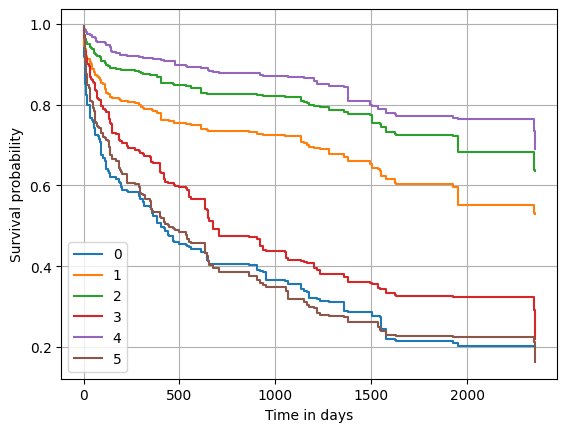

In [50]:
#Plot survivalcurve
surv = rsf.predict_survival_function(X_test_sel, return_array=True)
for i,s in enumerate(surv):
    plt.step(rsf.event_times_,s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

## Plot the predicted cumulative hazard function

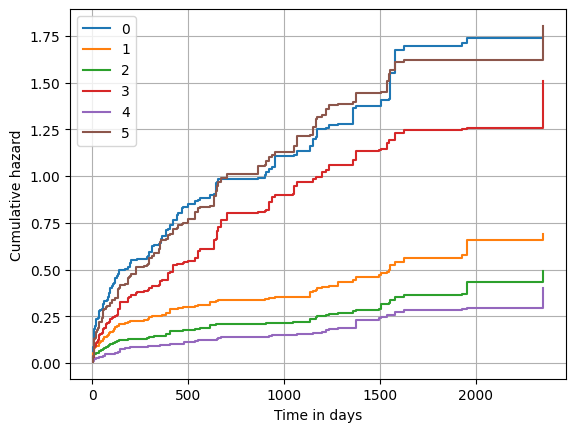

In [51]:
#plot thepredictedcumulativehazardfunction.
surv = rsf.predict_cumulative_hazard_function(X_test_sel, return_array=True)
for i,s in enumerate(surv):
    plt.step(rsf.event_times_,s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)